In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [ ]:
df= pd.read_csv('HR Data.csv')
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Data Cleaning and Preprocessing**

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

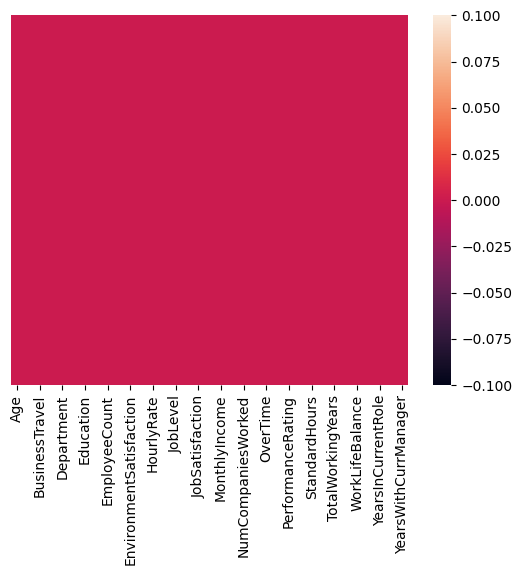

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

In [ ]:
df.Attrition = df.Attrition.map({'Yes':1,'No':0})

In [ ]:
df.BusinessTravel = df.BusinessTravel.map({'Travel_Frequently':1, 'Travel_Rarely':2,'Non-Travel':3})

In [ ]:
df.EducationField = df.EducationField.map({'Life Sciences':5, 'Medical':4, 'Marketing':3, 'Technical Degree':2, 'Human Resources':1,'Other':0})

In [ ]:
df.Department = df.Department.map({'Research & Development':2, 'Sales':1, 'Human Resources':0})

In [ ]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)

In [ ]:
df.JobRole = df.JobRole.map({'Sales Executive':8,'Research Scientist':7,'Laboratory Technician':6,
                                   'Manufacturing Director':5,'Healthcare Representative':4,'Manager':3,
                                   'Sales Representative':2,'Research Director':1,'Human Resources':0})

In [ ]:
df.MaritalStatus = df.MaritalStatus.map({'Single':2,'Married':1,'Divorced':0})

In [ ]:
df.OverTime = df.OverTime.map({'Yes':1,'No':0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   bool  
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Feature Selection**

In [ ]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1, inplace=True)

**Exploratory Data Analysis(EDA)**

In [ ]:
df.shape

(1470, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   bool 
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

**Data Visualisation**

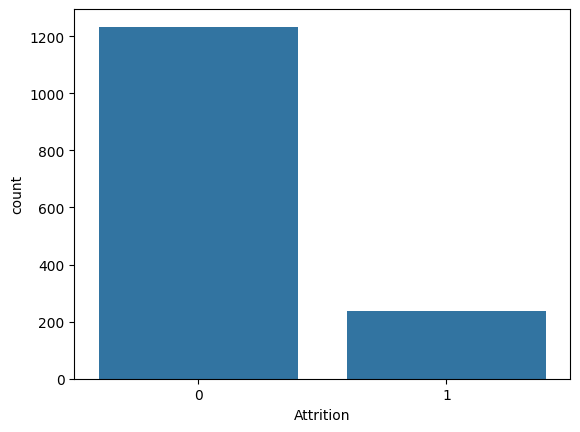

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.countplot(x=df.Attrition)
plt.figure(figsize=(10,5))
plt.show()

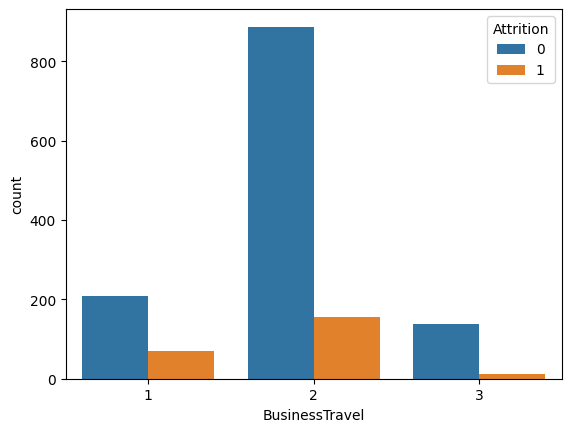

In [ ]:
sns.countplot(x = df.BusinessTravel, hue=df.Attrition)
plt.show()

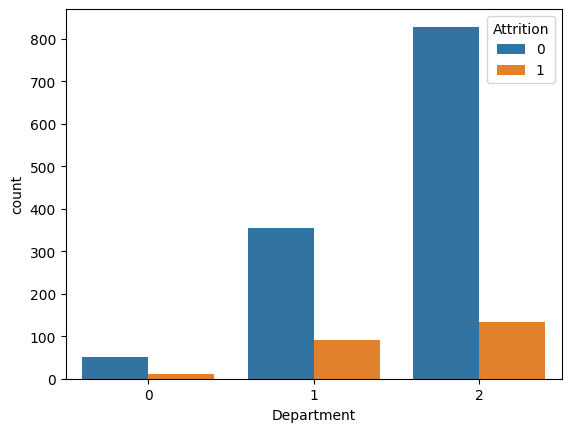

<Figure size 1000x300 with 0 Axes>

In [ ]:
sns.countplot(x = df.Department, hue = df.Attrition)
plt.figure(figsize=(10,3))
plt.show()

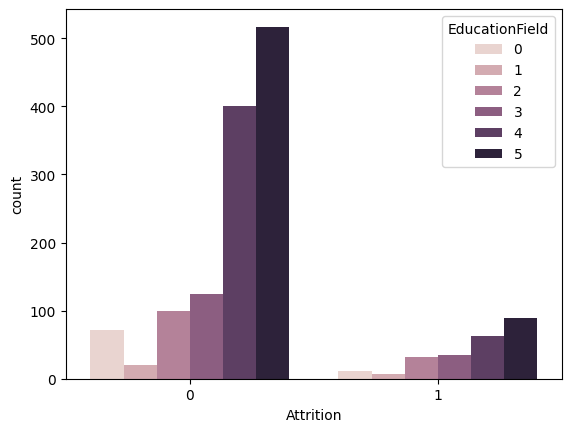

<Figure size 1000x700 with 0 Axes>

In [ ]:
sns.countplot(x = df.Attrition, hue = df.EducationField)
plt.figure(figsize=(10,7))
plt.show()

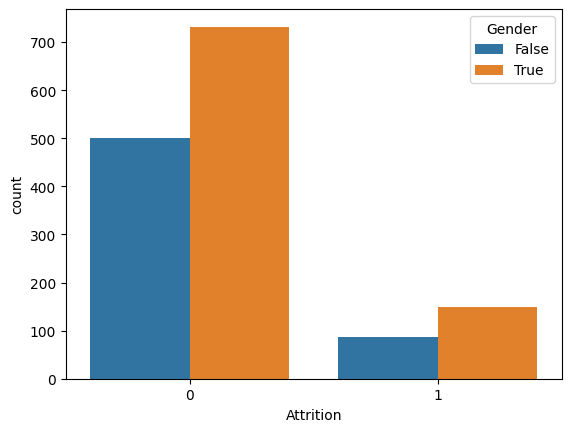

<Figure size 500x1000 with 0 Axes>

In [ ]:
sns.countplot(x=df.Attrition, hue=df.Gender)
plt.figure(figsize=(5,10))
plt.show()

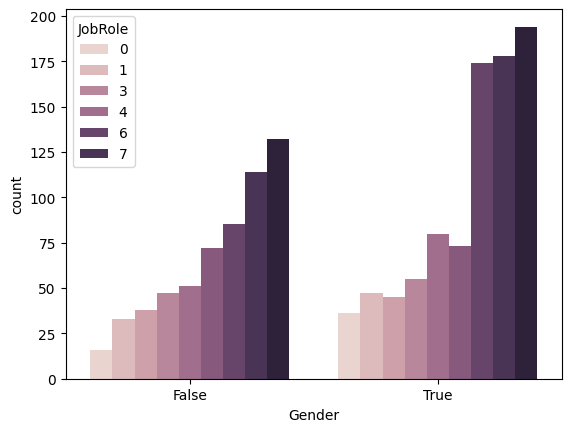

In [ ]:
sns.countplot(x=df.Gender, hue=df.JobRole)
plt.show()

Text(0, 0.5, 'Count')

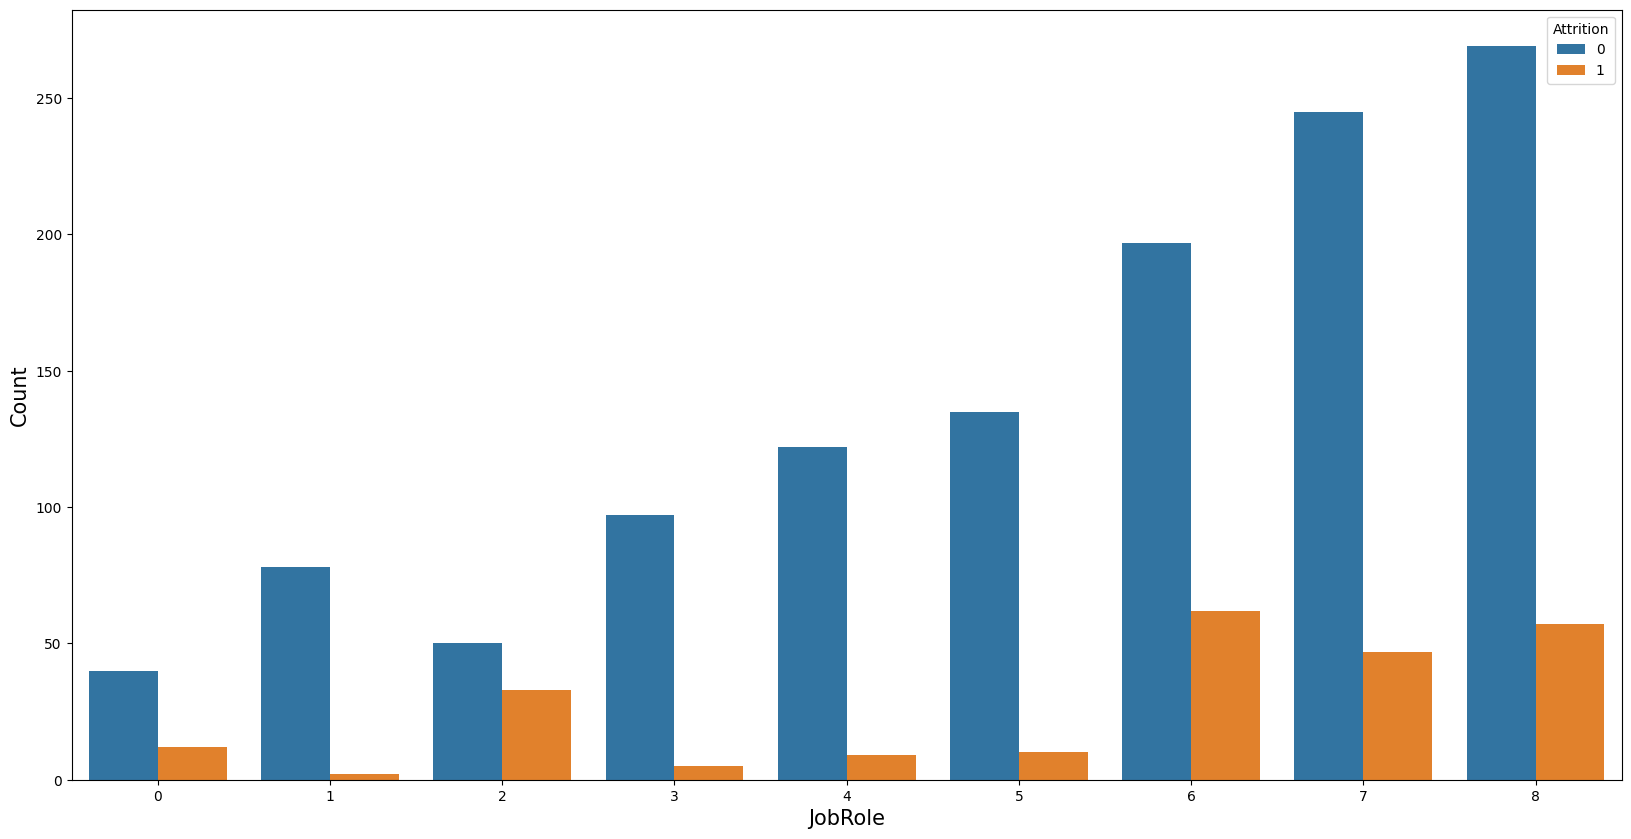

In [ ]:
plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x='JobRole', hue='Attrition',data=df)
plt.xlabel('JobRole',fontsize=15)
plt.ylabel('Count', fontsize=15)

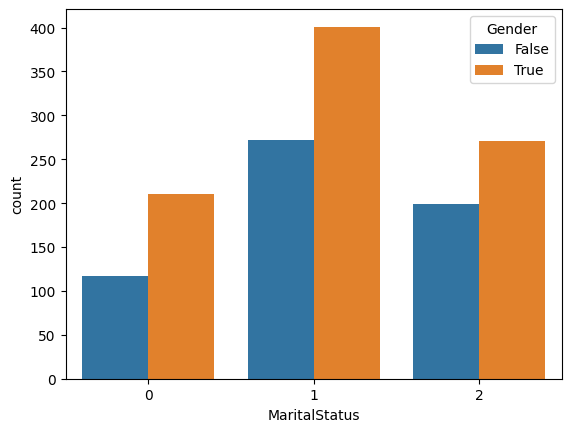

In [ ]:
sns.countplot(x=df.MaritalStatus, hue=df.Gender)
plt.show()

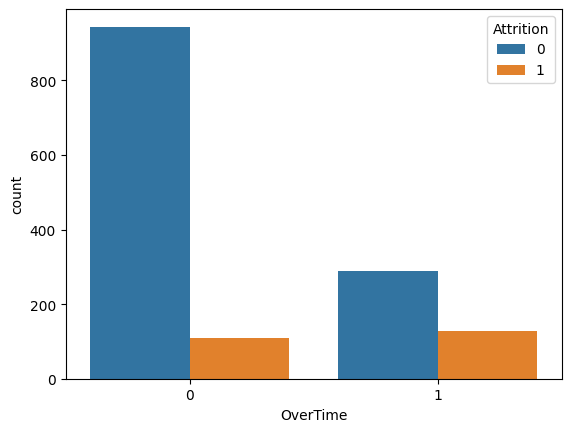

In [ ]:
sns.countplot(x=df.OverTime, hue=df.Attrition)
plt.show()

In [ ]:
num_col=[]
for column in df.columns:
  if df[column].dtype == 'int64' and len(df[column].unique())>= 10:

    num_col.append(column)
num_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
df1 = df[['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

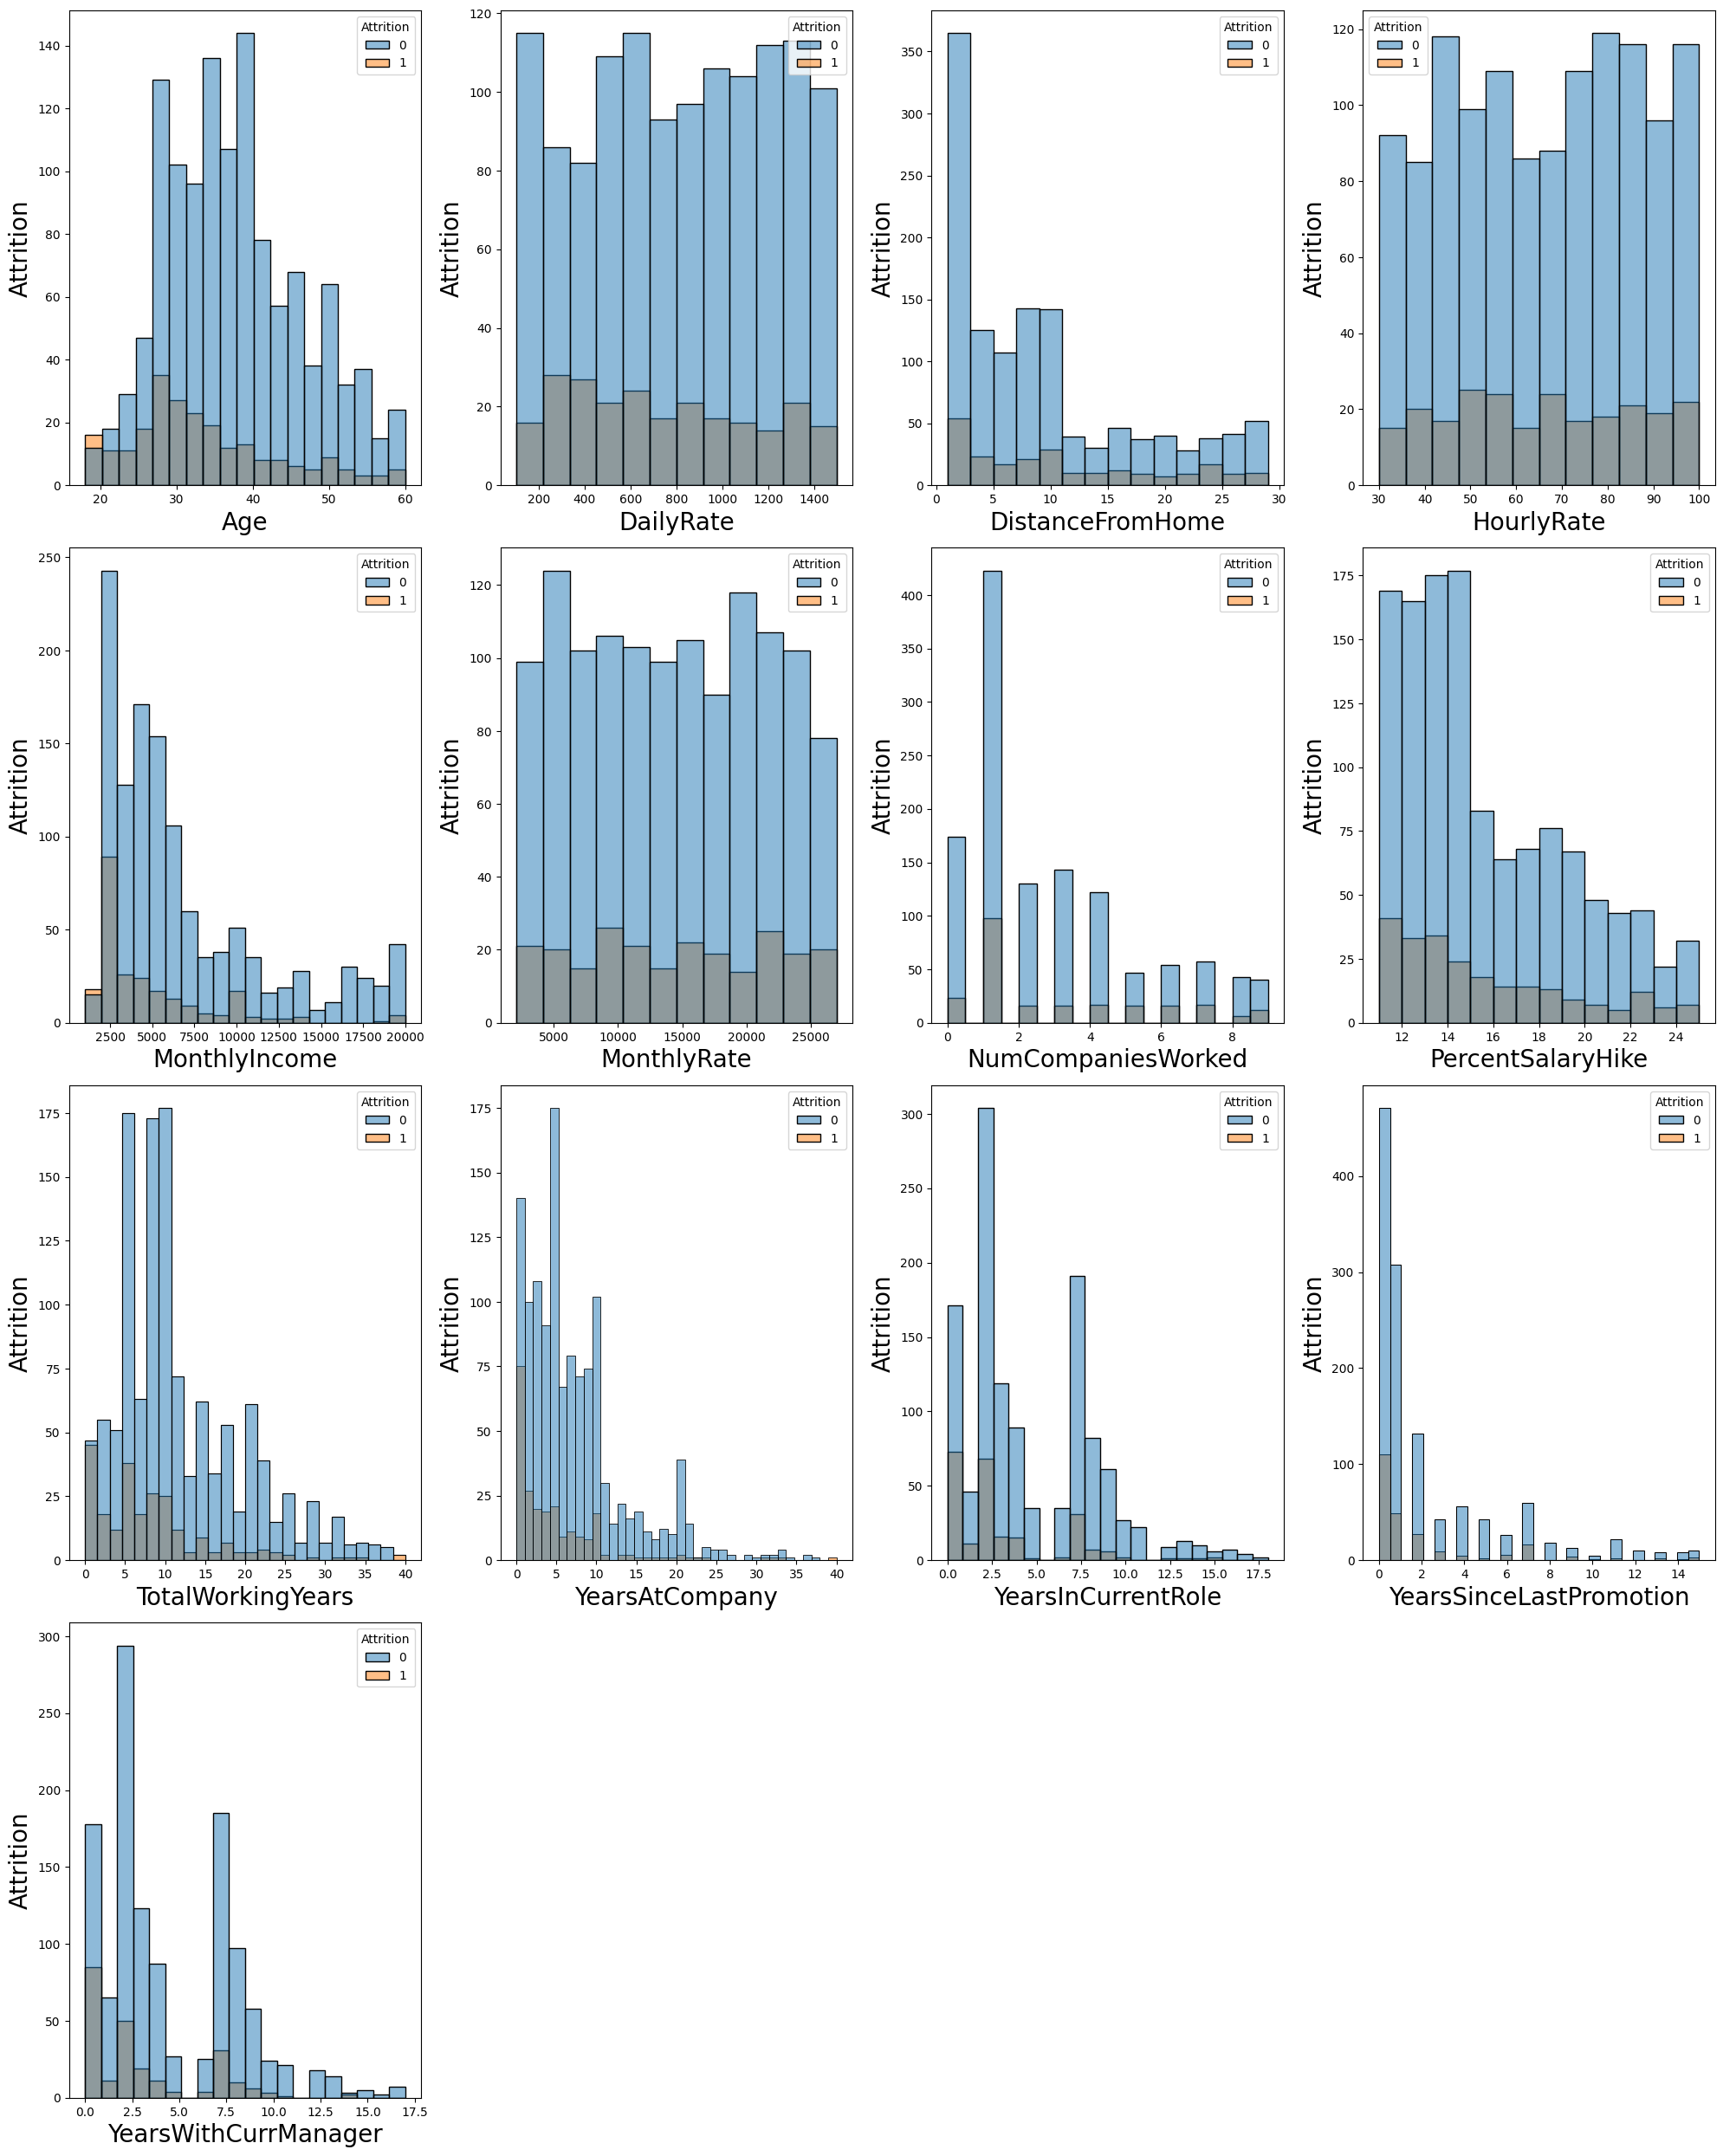

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber= 1

for column in df1:
  if plotnumber<=16:
    ax = plt.subplot(4,4,plotnumber)
    sns.histplot(x=df1[column].dropna(axis=0), hue = df.Attrition)
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Attrition',fontsize=20)
  plotnumber+=1
plt.tight_layout()

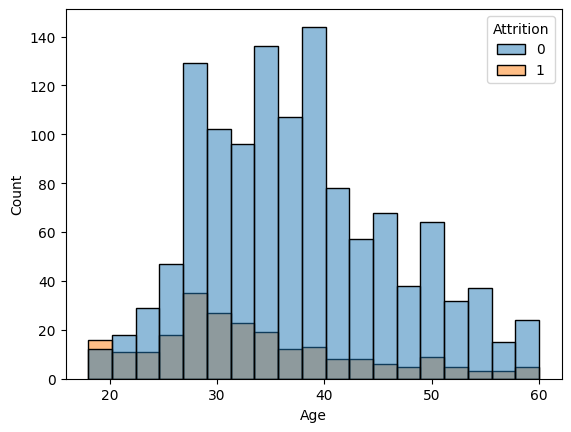

In [ ]:
sns.histplot(hue=df.Attrition, x=df.Age)
plt.show()

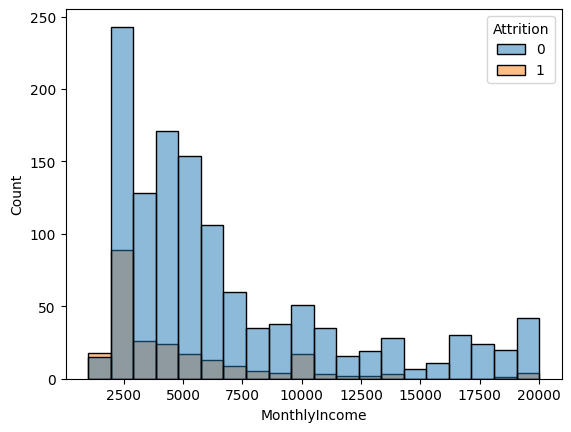

In [ ]:
sns.histplot(x= df.MonthlyIncome, hue=df.Attrition)
plt.show()

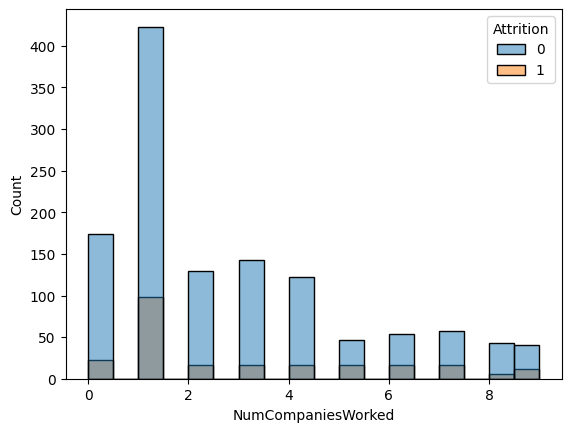

In [ ]:
sns.histplot(hue=df.Attrition, x= df.NumCompaniesWorked)
plt.show()

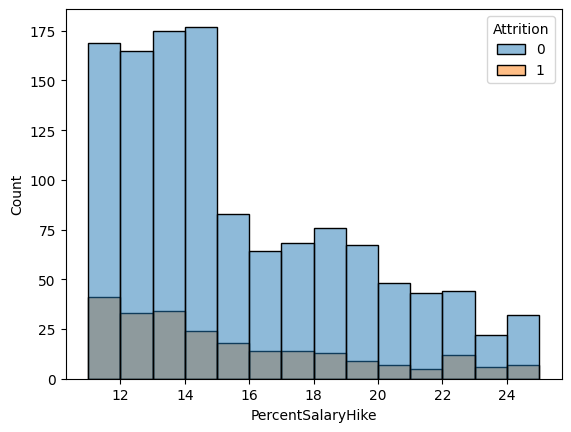

In [ ]:
sns.histplot(hue=df.Attrition, x=df.PercentSalaryHike)
plt.show()

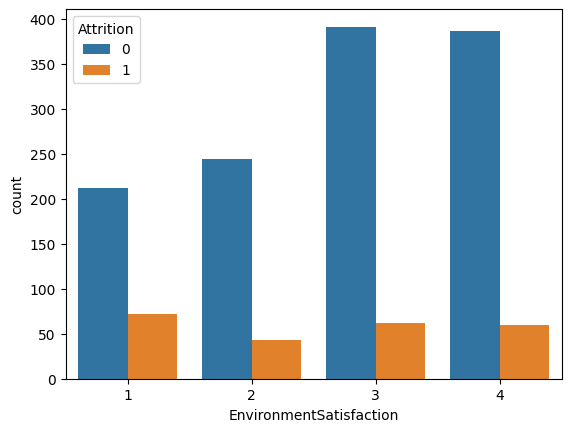

In [ ]:
sns.countplot(hue=df.Attrition, x=df.EnvironmentSatisfaction)
plt.show()

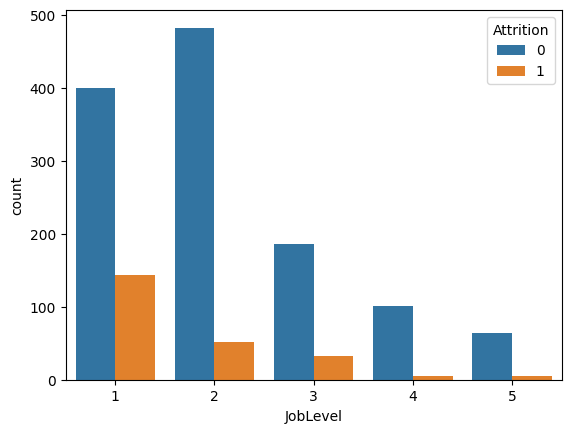

In [ ]:
sns.countplot(x=df.JobLevel, hue=df.Attrition)
plt.show()

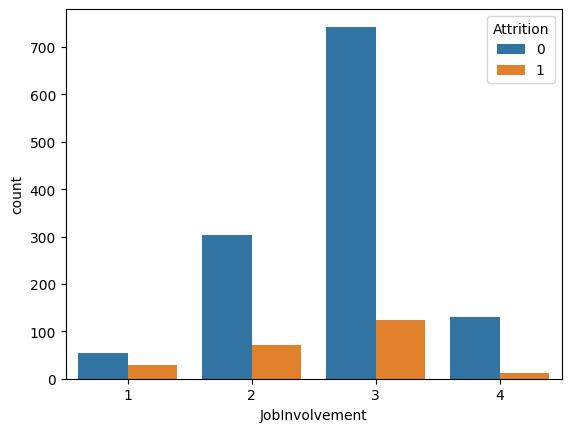

In [ ]:
sns.countplot(x = df.JobInvolvement, hue= df.Attrition)
plt.show()

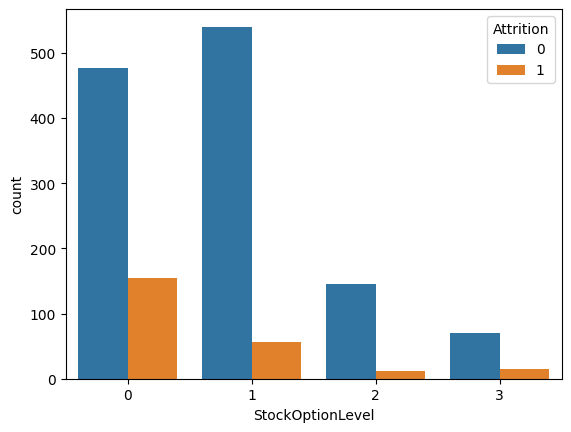

In [ ]:
sns.countplot(x=df.StockOptionLevel, hue=df.Attrition)
plt.show()

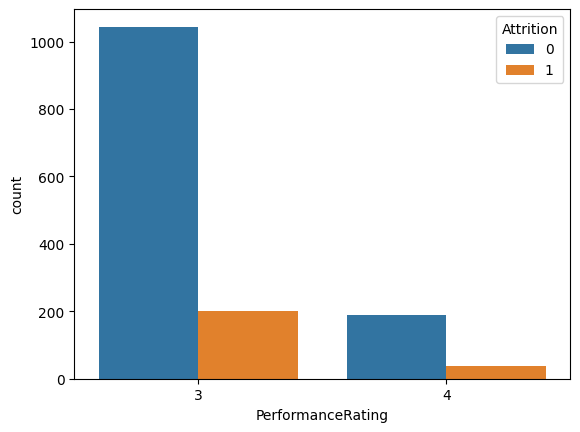

In [ ]:
sns.countplot(x=df.PerformanceRating, hue=df.Attrition)
plt.show()

**Model Creation**

In [ ]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,1,1,2,5,2,False,94,3,2,8,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,2,8,1,5,3,True,61,2,2,7,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,2,2,2,0,4,True,92,2,1,6,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,2,3,4,5,4,False,56,3,1,7,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,2,2,1,4,1,True,40,3,1,6,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


**Balancing The Target Column using SMOTE**

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
print('Unbalanced data :', Counter(y))
x_sm,y_sm = sm.fit_resample(x,y)
print('Balanced data :',Counter(y_sm))

Unbalanced data : Counter({0: 1233, 1: 237})
Balanced data : Counter({1: 1233, 0: 1233})


**Training and testing the model**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, random_state=42, test_size=0.25)

**Building the model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

**Predicting the model**

In [ ]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       311
           1       0.78      0.85      0.81       306

    accuracy                           0.81       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.81      0.81      0.81       617



In [ ]:
train_pred = dt.predict(x_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       927

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_prediction = rfc.predict(x_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91       311
           1       0.94      0.88      0.91       306

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

